# histogram

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path=r"D:\Amjid_Ali\opencv\OpenCv\image processing\image pyramids\apple.jpeg"

In [3]:
img=cv2.imread(path,0)

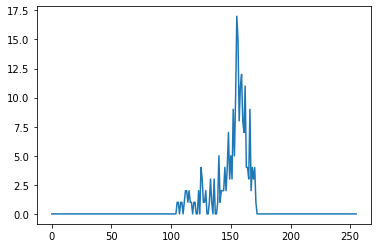

In [15]:
# histogram calculate
#parameters
# 1 source image,
# 2 channels
# 3 mask-> if we want to find histogram of space region
# 4 histSize= it represent BIN count
# 5 ranges   



hist=cv2.calcHist(img,[0], None, [256], [0,256])
plt.plot(hist)
plt.show()

# histogram in numpy 

In [28]:
hist,bins=np.histogram(img.ravel(),256,[0,256])

# plotting

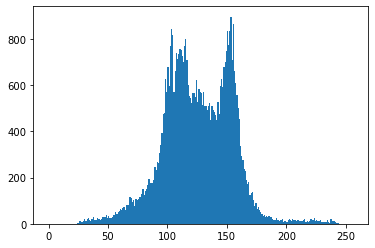

In [29]:
plt.hist(img.ravel(),256,[0,256]);plt.show()

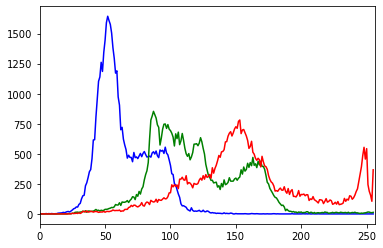

In [35]:
img=cv2.imread(path)
color=('b','g','r')
for i,col in enumerate(color):
    hist=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,256])
plt.show()

# mask

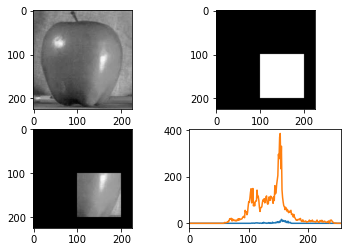

In [58]:
img=cv2.imread(path,0)

mask=np.zeros(img.shape[:2],np.uint8)
mask[100:200, 100:200]=255

masked_img=cv2.bitwise_and(img,img, mask=mask)

hist_full=cv2.calcHist(img,[0],None,[256],[0,256])
# hist_mask=cv2.calcHist(img,[0],mask,[256],[0,256])
hist_mask=cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221),plt.imshow(img,'gray')
plt.subplot(222),plt.imshow(mask,'gray')
plt.subplot(223),plt.imshow(masked_img,'gray')
plt.subplot(224),plt.plot(hist_full),plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

# color

In [59]:
img=cv2.imread(path)
hist=cv2.calcHist(img,[3],None,[256],[0,256])

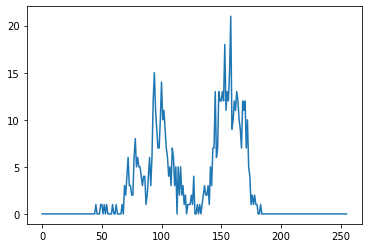

In [61]:
plt.plot(hist)

# histogram equalization

In [3]:
img=cv2.imread(path,0)

In [4]:
hists,bins=np.histogram(img.flatten(),256,[0,256])

In [10]:
cdf=hists.cumsum()
cdf_normalized=cdf*float(hists.max())/cdf.max()

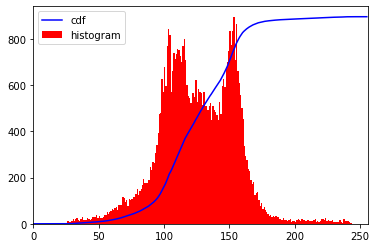

In [13]:
plt.plot(cdf_normalized,color="b")
plt.hist(img.flatten(),256,[0,256],color="r")
plt.xlim([0,256])
plt.legend(('cdf',"histogram"),loc="upper left")
plt.show()

In [14]:
cdf_m=np.ma.masked_equal(cdf,0)
cdf_m=(cdf_m-cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf=np.ma.filled(cdf_m,0).astype("uint8")

In [15]:
img2=cdf[img]

# histograms equalizations in opencv

In [22]:
img=cv2.imread(path,0)
equ=cv2.equalizeHist(img)
res= np.hstack((img,equ))

# plt.imshow(img,'gray')
# plt.imshow(equ,'gray')

# plt.hist(img.flatten(),256,[0,256],color="r")
# plt.hist(equ.flatten(),256,[0,256],color="r")

# CLAHE (contrast limited adaptive histogram equalization)

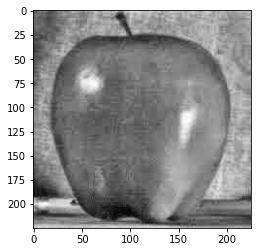

In [28]:
img=cv2.imread(path,0)
clahe=cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1=clahe.apply(img)
plt.imshow(cl1,'gray')
# plt.imshow(img,'gray')

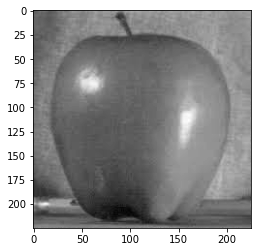